# Data Scientist - Code Challenge

We need to predict the demand for the next 24 hours by utilizing past electricity demand data points, humidity, temperature, dew point, and other drivers like weekdays, holidays, and etc. 

#### Inputs: 

- sample data.csv is attached. 


### Output: 

A 24-hour demand forecast for a sample day in July or August. 

  
## General Requirements
- The data set may contain outliers and abnormal values.
- This is everything you need to know about having a better development experience. 
- Write an instruction to run the project.
- Don’t commit the .vscode or .idea directory.

### Evaluation:

- The work will be evaluated based on the accuracy of the electricity demand forecast, the clarity of the code and documentation, and the overall effectiveness of the solution.
- The acceptable error rate must be less than 5% (AE < 500 MW, or accuracy more than 95%)
  
### Deliverables for the Code Challenge

- Detailed Report: Provide a comprehensive report covering model selection, fine-tuning processes, evaluation metrics, and results.
- Code and Documentation: Include all code and documentation necessary to reproduce the experiments and results.

### Submission
- Please submit a GitHub link with your work and fork the repository for collaboration.
- You have 1 week to send the challenge!

# Solution:

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\rushi\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Load the dataset

In [2]:
# Load the dataset
file_path = './Sample Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39408 entries, 0 to 39407
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               39408 non-null  object 
 1   Weekday            39408 non-null  object 
 2   Hour               39408 non-null  int64  
 3   HOEP               39408 non-null  float64
 4   Ontario_Demand     39408 non-null  int64  
 5   Temperature        39408 non-null  float64
 6   Windchill_Index    39408 non-null  float64
 7   Wind_Speed         39408 non-null  int64  
 8   Humidex            39408 non-null  float64
 9   Relative_Humidity  39408 non-null  int64  
 10  Dew_Point          39408 non-null  float64
 11  Pressure_Station   39408 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 3.6+ MB


In [4]:
data.describe(include='all')

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
count,39408,39408,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000
unique,1827,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-11-04,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,5701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,11.625076,13.923340,15397.914205,9.421272,6.565978,16.854243,9.859521,68.028598,3.330397,99.533605
std,NaN,NaN,6.945136,11.902378,2201.241563,10.899602,13.513148,9.220125,14.325742,16.773789,10.269080,0.776696
min,NaN,NaN,0.000000,-2.770000,9831.000000,-26.000000,-39.660000,0.000000,-31.100000,13.000000,-31.600000,96.490000
25%,NaN,NaN,6.000000,3.300000,13775.000000,0.800000,-3.950000,10.000000,-1.680000,57.000000,-4.400000,99.050000
50%,NaN,NaN,12.000000,12.950000,15272.000000,8.600000,5.670000,16.000000,7.860000,69.000000,3.000000,99.540000
75%,NaN,NaN,18.000000,22.510000,16881.000000,19.000000,18.580000,22.000000,22.350000,81.000000,12.100000,100.040000


# Cleaning

### Check for missing values

In [5]:
missing_values = data.isnull().sum()
missing_values

Date                 0
Weekday              0
Hour                 0
HOEP                 0
Ontario_Demand       0
Temperature          0
Windchill_Index      0
Wind_Speed           0
Humidex              0
Relative_Humidity    0
Dew_Point            0
Pressure_Station     0
dtype: int64

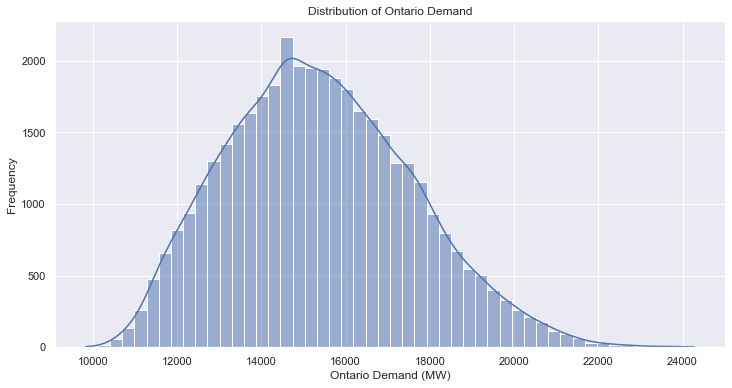

In [6]:
# Plot the distribution of Ontario Demand
plt.figure(figsize=(12, 6))
sns.histplot(data['Ontario_Demand'], bins=50, kde=True)
plt.title('Distribution of Ontario Demand')
plt.xlabel('Ontario Demand (MW)')
plt.ylabel('Frequency')
plt.show()

### Handling outliers

In [7]:
# Define a function to detect and replace outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    
    # Replace outliers with the median value
    df[column] = np.where((df[column] > upper_bound) | (df[column] < lower_bound), median, df[column])
    return df

# Apply the function to the target variable 'Ontario_Demand'
data = handle_outliers(data, 'Ontario_Demand')

# Check for outliers in other numeric columns and handle them similarly
numeric_columns = ['Temperature', 'Windchill_Index', 'Wind_Speed', 'Humidex', 'Relative_Humidity', 'Dew_Point', 'Pressure_Station']
for col in numeric_columns:
    data = handle_outliers(data, col)

# Print the first few rows to verify
print(data.head())

         Date Weekday  Hour  HOEP  Ontario_Demand  Temperature  \
0  2016-01-01  Friday     0  0.49         14023.0         -0.3   
1  2016-01-01  Friday     1 -1.09         13417.0         -0.3   
2  2016-01-01  Friday     2 -2.41         12968.0         -0.4   
3  2016-01-01  Friday    12  0.00         14215.0         -2.1   
4  2016-01-01  Friday    13  0.00         14443.0         -2.4   

   Windchill_Index  Wind_Speed  Humidex  Relative_Humidity  Dew_Point  \
0            -5.62        20.0    -3.18               70.0       -5.1   
1            -6.30        25.0    -3.48               68.0       -5.5   
2            -6.55        26.0    -3.43               73.0       -4.7   
3            -8.72        23.0    -4.86               76.0       -5.8   
4            -8.23        19.0    -5.09               84.0       -4.7   

   Pressure_Station  
0             99.67  
1             99.63  
2             99.59  
3             99.39  
4             99.35  


# Data Preprocessing

### Feature creation

In [8]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create additional time-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Generate a list of Canadian holidays
import holidays
canadian_holidays = holidays.CA()
data['Holiday'] = data['Date'].isin(canadian_holidays).astype(int)

# Display the first few rows with the new features
data.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station,Year,Month,Day,Holiday
0,2016-01-01,Friday,0,0.49,14023.0,-0.3,-5.62,20.0,-3.18,70.0,-5.1,99.67,2016,1,1,0
1,2016-01-01,Friday,1,-1.09,13417.0,-0.3,-6.30,25.0,-3.48,68.0,-5.5,99.63,2016,1,1,0
2,2016-01-01,Friday,2,-2.41,12968.0,-0.4,-6.55,26.0,-3.43,73.0,-4.7,99.59,2016,1,1,0
3,2016-01-01,Friday,12,0.00,14215.0,-2.1,-8.72,23.0,-4.86,76.0,-5.8,99.39,2016,1,1,0
4,2016-01-01,Friday,13,0.00,14443.0,-2.4,-8.23,19.0,-5.09,84.0,-4.7,99.35,2016,1,1,0


### Feature Encodeing

In [9]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'Day_of_Week'
encoder = OneHotEncoder(drop=None, sparse=False)
encoded_days = encoder.fit_transform(data[['Weekday']])
encoded_days_df = pd.DataFrame(encoded_days, columns=encoder.get_feature_names_out(['Weekday']), index=data.index)

# Concatenate the encoded days with the original data
data = pd.concat([data, encoded_days_df], axis=1)
data.drop(columns=['Weekday'], inplace=True)

# Display the first few rows with the new features
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Date,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,...,Month,Day,Holiday,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,2016-01-01,0,0.49,14023.0,-0.3,-5.62,20.0,-3.18,70.0,-5.1,...,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-01,1,-1.09,13417.0,-0.3,-6.30,25.0,-3.48,68.0,-5.5,...,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-01,2,-2.41,12968.0,-0.4,-6.55,26.0,-3.43,73.0,-4.7,...,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-01,12,0.00,14215.0,-2.1,-8.72,23.0,-4.86,76.0,-5.8,...,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-01,13,0.00,14443.0,-2.4,-8.23,19.0,-5.09,84.0,-4.7,...,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

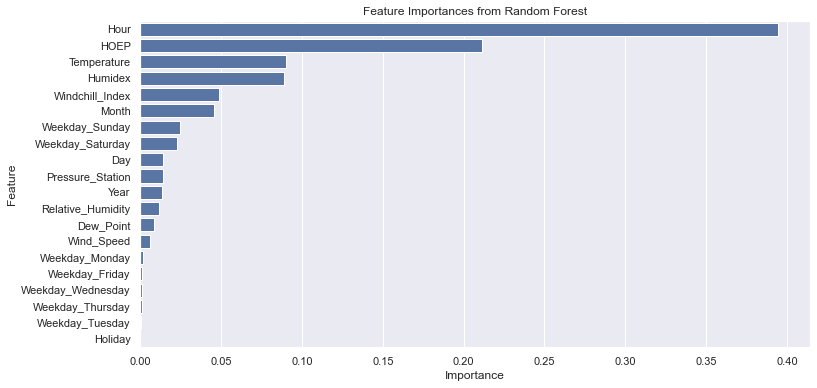

Top features: ['Hour', 'HOEP', 'Temperature', 'Humidex', 'Windchill_Index', 'Month', 'Weekday_Sunday', 'Weekday_Saturday', 'Day', 'Pressure_Station', 'Year', 'Relative_Humidity', 'Dew_Point', 'Wind_Speed']


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Using Random Forest feature importance to select top features
all_features = [x for x in data.columns if x not in ['Ontario_Demand','Date']]
target = 'Ontario_Demand'
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(data[all_features], data[target])

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

# Select top N important features
top_features = feature_importance_df['Feature'].head(14).tolist()
print(f'Top features: {top_features}')

### Train Test Split

In [11]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Split data into training and test sets
train_data = data[data['Date'] < '2020-07-01']
test_data = data[data['Date'] >= '2020-07-01']

X_train = train_data[top_features]
y_train = train_data[target]
X_test = test_data[top_features]
y_test = test_data[target]

### Scaler Transformation

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Handle outliers in training and test sets
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

<ipython-input-12-9397360c6a83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
<ipython-input-12-9397360c6a83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


# Model Selection

### xgboost
A powerful gradient boosting framework

In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


Mean Absolute Error (MAE): 703.24
Mean Absolute Percentage Error (MAPE): 4.53%
Mean Squared Error (MSE): 1067504.23
Root Mean Squared Error (RMSE): 1033.20
R-squared (R²): 0.80
Accuracy: 95.47%


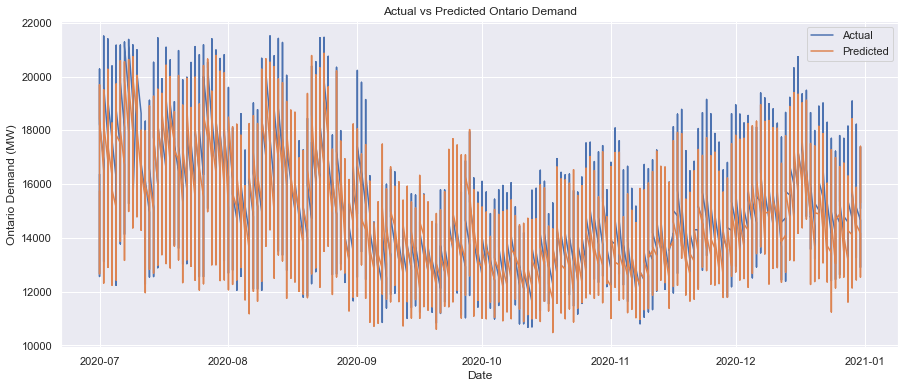

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
predictions = best_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

accuracy = 100 - (mape * 100)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')
print(f'Accuracy: {accuracy:.2f}%')

# Plot actual vs predicted demand
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(test_data['Date'], y_test, label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Ontario Demand (MW)')
plt.title('Actual vs Predicted Ontario Demand')
plt.legend()
plt.show()

# Random Forest

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters found: {grid_search.best_params_}')

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
374 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\Anaconda3\lib\site-packa

Best parameters found: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Mean Absolute Error (MAE): 755.49
Mean Absolute Percentage Error (MAPE): 4.85%
Mean Squared Error (MSE): 1125958.11
Root Mean Squared Error (RMSE): 1061.11
R-squared (R²): 0.79
Accuracy: 95.15%


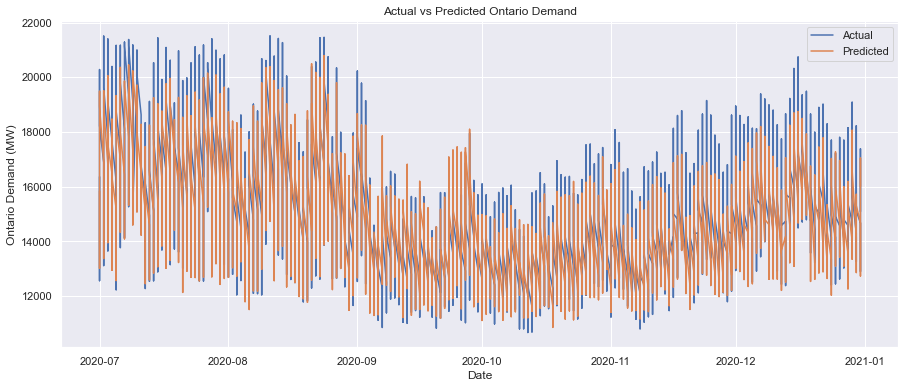

In [16]:
# Use the best model from grid search
best_rf = grid_search.best_estimator_

# Make predictions
predictions = best_rf.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

accuracy = 100 - (mape * 100)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')
print(f'Accuracy: {accuracy:.2f}%')

# Plot actual vs predicted demand
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(test_data['Date'], y_test, label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Ontario Demand (MW)')
plt.title('Actual vs Predicted Ontario Demand')
plt.legend()
plt.show()